[![pre-commit](https://img.shields.io/badge/pre--commit-enabled-brightgreen?logo=pre-commit&logoColor=white)](https://github.com/pre-commit/pre-commit) [![license](https://img.shields.io/badge/License-GPL%20v3-blue.svg)](https://github.com/LegrandNico/metadPy/blob/master/LICENSE) [![pip](https://badge.fury.io/py/metadPy.svg)](https://badge.fury.io/py/metadPy) [![travis](https://travis-ci.com/LegrandNico/metadPy.svg?branch=master)](https://travis-ci.com/LegandNico/metadPy) [![codecov](https://codecov.io/gh/LegrandNico/metadPy/branch/master/graph/badge.svg)](https://codecov.io/gh/LegrandNico/metadPy) [![black](https://img.shields.io/badge/code%20style-black-000000.svg)](https://github.com/psf/black) [![mypy](http://www.mypy-lang.org/static/mypy_badge.svg)](http://mypy-lang.org/)

***

<img src="https://github.com/LegrandNico/metadPy/raw/master/images/logo.png" align="left" alt="metadPy" height="250" HSPACE=30>

metadPy is an open-source Python package dedicated to behavioural data
analysis for metacognition research. It is aimed to provide simple yet powerful functions to compute standard index and metric of signal detection theory (SDT) and metacognitive efficiency (meta-d’ and hierarchical meta-d’) [1, 2], only provided with a data frame encoding task performances and confidence ratings at the trial level.

metadPy is written in Python 3 and use mostly [Numpy](https://numpy.org/), [Scipy](https://www.scipy.org/) and [Pandas](https://pandas.pydata.org/>). Computing meta-d’ using maximum likelihood estimation (MLE) is based on Scipy. Hierarchical Bayesian modelling of meta-d’ and m-ratio is based on [pymc](https://docs.pymc.io/>).

# Installation

metadPy can be installed using pip:

```shell
pip install git+https://github.com/LegrandNico/metadPy.git
```

The following packages are required:

* Numpy (>=1.15)
* SciPy (>=1.3.0)
* Pandas (>=0.24)
* Matplotlib (>=3.0.2)
* Seaborn (>=0.9.0)
* pymc (>=3.8)

# Why metadPy?

metadPy refers to meta-d' (meta-d prime), which is a behavioural metric commonly used in consciousness metacognition research and reflecting metacognitive efficiency (i.e the relationship between subjective reports and objective behaviour).

metadPy aims to be a Python equivalent of the hMeta-d toolbox (available in Matlab and R). It tries to make these models available to a broader open-source ecosystem and to ease their use via modern (cloud) computing interfaces using either CPU or GPU. While several packages already exist in Python and other languages to compute signal detection theory metrics, the Bayesian modelling of confidence data, a prominent method proposed by Steve Fleming (see [2, 3]) to analyse task performance and confidence ratings, is based on JAGS, which does not support GPU computing and rely on a Gibbs sampler to explore the posterior distribution. Because it relies on pymc and Theano, metadPy can easily be parallelized and use a broader variety of MCMC sampling algorithms (comprising NUTS).

For an extensive introduction to metadPy, you can navigate the following notebooks that are Python adaptations of the introduction to the hMeta-d toolbox written in Matlab by Olivia Faul for the Zurich Computational Psychiatry course (see [this link](https://github.com/metacoglab/HMeta-d/tree/master/CPC_metacog_tutorial)).

1. What metacognition looks like? [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/LegrandNico/metadPy/blob/master/notebooks/1%20-%20What%20metacognition%20looks%20like.ipynb) [![View the notebook](https://img.shields.io/badge/render-nbviewer-orange.svg)](https://github.com/LegrandNico/metadPy/blob/master/notebooks/1%20-%20What%20metacognition%20looks%20like.ipynb)

2. Fitting the model [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/LegrandNico/metadPy/blob/master/notebooks/2%20-%20Fitting%20the%20model.ipynb) [![View the notebook](https://img.shields.io/badge/render-nbviewer-orange.svg)](https://github.com/LegrandNico/metadPy/blob/master/notebooks/2%20-%20Fitting%20the%20model.ipynb)

3. Hierarchical Bayesian model of metacognition

Or just follow the quick tour below.

<div class="alert alert-block alert-warning"><b>Warning:</b> This work is still under progress. The code is continuously optimized for speed, precision, and checked for errors. Please always double-check your results with other toolboxes.</div>

# Importing data

Classical metacognition experiments contain two phases: task performance and confidence ratings. The task performance could for example be the ability to distinguish the presence of a dot on the screen. By relating trials where stimuli are present or absent and the response provided by the participant (Can you see the dot: yes/no), it is possible to obtain the accuracy. The confidence rating is proposed to the participant when the response is made and should reflect how certain the participant is about his/her judgement.

An ideal observer would always associate very high confidence ratings with correct task-I responses, and very low confidence ratings with an incorrect task-1 response, while a participant with a low metacognitive efficiency will have a more mixed response pattern.

A minimal metacognition dataset will therefore consist in a data frame populated with 5 columns:
* `Stimuli`: Which of the two stimuli was presented [0 or 1].
* `Response`: The response made by the participant [0 or 1].
* `Accuracy`: Was the participant correct? [0 or 1].
* `Confidence`: The confidence level [can be continuous or discrete rating].
* `ntrial`: The trial number.

Due to the logical dependence between the `Stimuli`, `Responses` and `Accuracy` columns, in practice only two of those columns are necessary, the third being deduced from the others. Most of the functions in `metadPy` will accept DataFrames containing only two of these columns, and will automatically infer the missing information. Similarly, as the metacognition models described here does not incorporate the temporal dimension, the trial number is optional. 

`metadPy` includes a simulation function that will let you create one such data frame for one or many participants and condition, controlling for a variety of parameters. Here, we will simulate 200 trials from  participant having `d=1` and `c=0` (task performances) and a `meta-d=1.5` (metacognitive sensibility). The confidence ratings were provided using a 1-to-4 rating scale.

In [3]:
from metadPy.utils import responseSimulation

simulation = responseSimulation(d=1, metad=1.5, c=0, nRatings=4, nTrials=200)
simulation

,Stimuli,Responses,Accuracy,Confidence,nTrial,Subject,Condition
0,1,1,1,3,0,0,0
1,0,1,0,1,1,0,0
2,1,1,1,4,2,0,0
3,1,0,0,3,3,0,0
4,1,1,1,2,4,0,0
...,...,...,...,...,...,...,...
195,0,0,1,2,195,0,0
196,0,0,1,3,196,0,0
197,0,0,1,3,197,0,0
198,0,0,1,1,198,0,0


In [4]:
from metadPy.utils import trials2counts

nR_S1, nR_S2 = trials2counts(
    data=simulation,
    stimuli="Stimuli",
    accuracy="Accuracy",
    confidence="Confidence",
    nRatings=4,
)

## Data visualization

You can easily visualize metacognition results using one of the plotting functions. Here, we will use the `plot_confidence` and the `plot_roc` functions to visualize the metacognitive performance of our participant.

In [32]:
import arviz as az
import matplotlib.pyplot as plt
import seaborn as sns
from metadPy.plotting import plot_confidence, plot_roc

sns.set_context("talk")

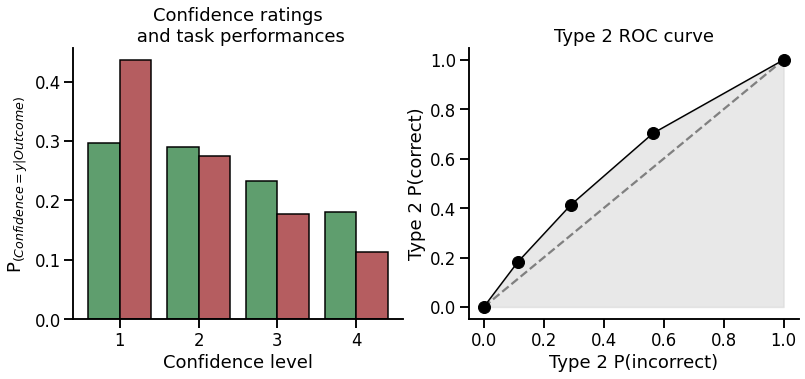

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(13, 5))
plot_confidence(nR_S1, nR_S2, ax=axs[0])
plot_roc(nR_S1, nR_S2, ax=axs[1])
sns.despine()

# Signal detection theory (SDT)

In [7]:
from metadPy.sdt import criterion, dprime, rates, roc_auc, scores

All metadPy functions are registred as Pandas flavors (see [pandas-flavor](https://pypi.org/project/pandas-flavor/)), which means that the functions can be called as a method from the result data frame. When using the default columns names (`Stimuli`, `Response`, `Accuracy`, `Confidence`), this significantly reduces the length of the function call, making your code more clean and readable.

In [8]:
simulation.criterion()

5.551115123125783e-17

In [9]:
simulation.dprime()

0.9917006946949065

In [10]:
simulation.rates()

(0.69, 0.31)

In [11]:
simulation.roc_auc(nRatings=4)

0.5797055057618438

In [12]:
simulation.scores()

(69, 31, 31, 69)

# Estimating meta dprime using Maximum Likelyhood Estimates (MLE)


In [18]:
from metadPy.mle import metad

metad = metad(
    data=simulation,
    nRatings=4,
    stimuli="Stimuli",
    accuracy="Accuracy",
    confidence="Confidence",
    verbose=0,
)
print(f'meta-d\' = {str(metad["meta_da"])}')

/usr/local/lib/python3.6/dist-packages/scipy/optimize/_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)


meta-d' = 0.5223485447196857


# Estimating meta-dprime using hierarchical Bayesian modeling


## Subject level

In [19]:
import pymc as pm
from metadPy.hierarchical import hmetad

In [20]:
model, trace = hmetad(
    data=simulation,
    nRatings=4,
    stimuli="Stimuli",
    accuracy="Accuracy",
    confidence="Confidence",
)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [cS2_hn, cS1_hn, metad, d1, c1]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 15 seconds.
/usr/local/lib/python3.6/dist-packages/arviz/data/io_pymc.py:314: UserWarning: Could not compute log_likelihood, it will be omitted. Check your model object or set log_likelihood=False
  warnings.warn(warn_msg)
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


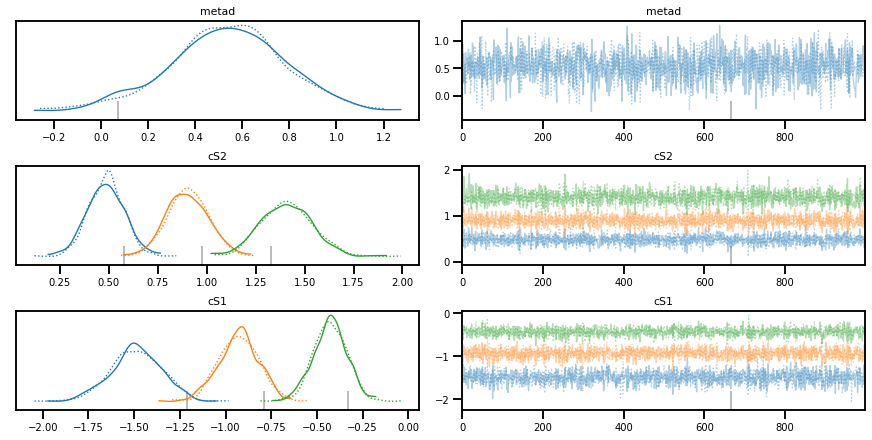

In [21]:
pm.traceplot(trace, var_names=["metad", "cS2", "cS1"]);

In [22]:
pm.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
metad,0.534,0.245,0.018,0.960,0.006,0.004,1779.0,1779.0,1810.0,1376.0,1.00
cS1[0],-1.488,0.139,-1.755,-1.239,0.003,0.002,1871.0,1846.0,1879.0,1615.0,1.01
cS1[1],-0.928,0.109,-1.125,-0.725,0.002,0.002,2161.0,2121.0,2155.0,1813.0,1.00
cS1[2],-0.429,0.092,-0.596,-0.259,0.002,0.001,1987.0,1909.0,1988.0,1742.0,1.00
cS2[0],0.486,0.093,0.317,0.664,0.002,0.001,2200.0,2197.0,2188.0,1710.0,1.00
cS2[1],0.904,0.106,0.711,1.103,0.002,0.002,2051.0,2034.0,2049.0,1702.0,1.00
cS2[2],1.408,0.131,1.179,1.663,0.003,0.002,1784.0,1772.0,1786.0,1598.0,1.00


## Group level

In [24]:
simulation = responseSimulation(
    d=1, metad=1.5, c=0, nRatings=4, nTrials=200, nSubjects=10
)

In [25]:
model, trace = hmetad(
    data=simulation,
    nRatings=4,
    stimuli="Stimuli",
    accuracy="Accuracy",
    confidence="Confidence",
    subject="Subject",
)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [cS2_hn, cS1_hn, epsilon_logMratio, delta_tilde, sigma_delta, mu_logMratio, d1_tilde, c1_tilde, sigma_d1, sigma_c2, sigma_c1, mu_d1, mu_c2, mu_c1]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 84 seconds.
There were 13 divergences after tuning. Increase `target_accept` or reparameterize.
There were 24 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.


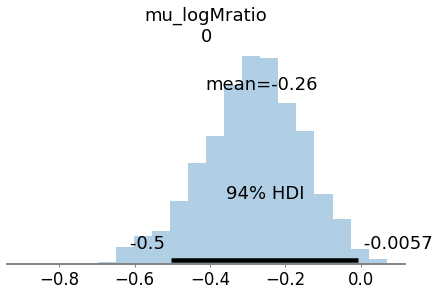

In [33]:
az.plot_posterior(trace, var_names=["mu_logMratio"], kind="hist", bins=20)

## Repeated measures

In [35]:
simulation = responseSimulation(
    d=1, metad=1.5, c=0, nRatings=4, nTrials=200, nSubjects=10, nConditions=2
)

In [36]:
model, trace = hmetad(
    data=simulation,
    nRatings=4,
    stimuli="Stimuli",
    accuracy="Accuracy",
    confidence="Confidence",
    subject="Subject",
    within="Condition",
)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [cS2_hn, cS1_hn, log_mRatio_tilde, tau_logMratio, Bd_Cond1, dbase_tilde, sigma_Cond1, mu_Cond1, sigma_D, mu_D, sigma_c2, mu_c2]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 127 seconds.
There were 21 divergences after tuning. Increase `target_accept` or reparameterize.
There were 53 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


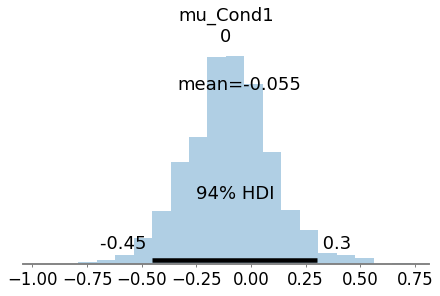

In [38]:
az.plot_posterior(trace, var_names=["mu_Cond1"], kind="hist", bins=20)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f387f3d1278>],
      dtype=object)

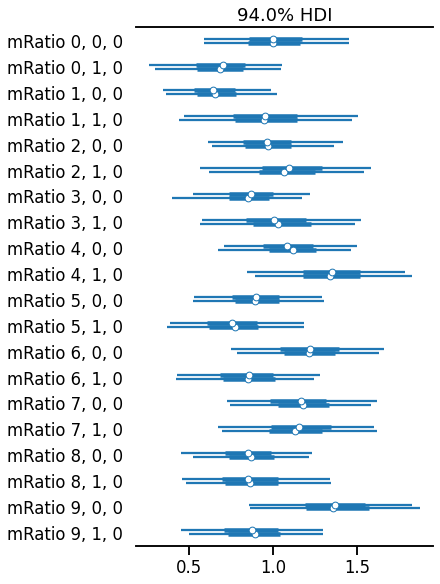

In [39]:
az.plot_forest(trace, var_names=["mRatio"])

# References

[1] Maniscalco, B., & Lau, H. (2014). Signal Detection Theory Analysis of Type 1 and Type 2 Data: Meta-d′, Response-Specific Meta-d′, and the Unequal Variance SDT Model. In The Cognitive Neuroscience of Metacognition (pp. 25–66). Springer Berlin Heidelberg. https://doi.org/10.1007/978-3-642-45190-4_3 

[2] Fleming, S. M., & Lau, H. C. (2014). How to measure metacognition. Frontiers in Human Neuroscience, 8. https://doi.org/10.3389/fnhum.2014.00443

[3] Fleming, S.M. (2017) HMeta-d: hierarchical Bayesian estimation of metacognitive efficiency from confidence ratings, Neuroscience of Consciousness, 3(1) nix007, https://doi.org/10.1093/nc/nix007
